In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model

from sklearn.model_selection import KFold

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

C:\Java\miniconda3\envs\.py39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### 타이타닉 승객 생존 여부 예측

In [3]:
df = pd.read_csv('data/titanic2.csv')

df.head() # 첫 다섯 줄을 봅니다.

,pclass,age,sibsp,parch,fare,gender,Embarked,Title,survived
0,1,29.0000,0,0,211.3375,0,2,10,1
1,1,0.9167,1,2,151.5500,1,2,9,1
2,1,2.0000,1,2,151.5500,0,2,10,0
3,1,30.0000,1,2,151.5500,1,2,13,0
4,1,25.0000,1,2,151.5500,0,2,14,0


In [14]:
df['survived'].value_counts()

0    808
1    498
Name: survived, dtype: int64

In [15]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [20]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# 모델을 실행합니다.
history = model.fit(X, y, epochs=200, batch_size=10, verbose=True)

Epoch 1/200
131/131 [==============================] - 1s 2ms/step - loss: 0.6657 - accuracy: 0.6700
Epoch 2/200
131/131 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7129
Epoch 3/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7113
Epoch 4/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7198
Epoch 5/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7205
Epoch 6/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7243
Epoch 7/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7251
Epoch 8/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7236
Epoch 9/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7427
Epoch 10/200
131/131 [==============================] - 0s 2ms/step - loss: 0.5227 - accura

In [23]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy
0,0.665665,0.669985
1,0.604807,0.712864
2,0.578115,0.711332
3,0.562132,0.719755
4,0.563031,0.720521


In [24]:
model.evaluate(X, y)[1]

41/41 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7917


0.7917304635047913

In [25]:
# 학습셋과 테스트셋을 구분합니다.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True)

In [26]:
# 모델을 재설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# 모델을 실행합니다.
early_stopping_callback = EarlyStopping(monitor='loss', patience=20)

modelpath = "data/model/titanic-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=10,validation_split=0.25, verbose=True, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/200
28/69 [===========>..................] - ETA: 0s - loss: 0.4285 - accuracy: 0.8071

C:\Users\LG PC\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


69/69 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8044 - val_loss: 0.5117 - val_accuracy: 0.7555
Epoch 2/200
69/69 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8102 - val_loss: 0.5403 - val_accuracy: 0.7511
Epoch 3/200
69/69 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8073 - val_loss: 0.5354 - val_accuracy: 0.7598
Epoch 4/200
69/69 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8073 - val_loss: 0.5168 - val_accuracy: 0.7642
Epoch 5/200
69/69 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8088 - val_loss: 0.5687 - val_accuracy: 0.7598
Epoch 6/200
69/69 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8102 - val_loss: 0.5154 - val_accuracy: 0.7467
Epoch 7/200
69/69 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8015 - val_loss: 0.5176 - val_accuracy: 0.7642
Epoch 8/200
69/69 [======

In [40]:
len(history.history['accuracy'])

67

In [41]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7781
Test accuracy: 0.7780612111091614


In [30]:
# 학습 결과를 저장하려면 model.save() 함수를 이용해 모델 이름을 적어 저장
# 모델 이름과 저장할 위치를 함께 지정합니다.
model.save('data/model/model_titanic.hdf5')

In [31]:
del model

In [32]:
# load_model() 함수를 사용해서 조금 전 저장한 모델을 불러옵니다.
# 모델이 저장된 위치와 이름까지 적어 줍니다.
model = load_model('./data/model/model_titanic.hdf5')

In [33]:
# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7883
Test accuracy: 0.7882652878761292


In [34]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy
0,1.528203,0.596280
1,0.633347,0.657549
2,0.617764,0.670678
3,0.597724,0.683807
4,0.593403,0.682713


In [36]:
y_loss = hist_df['loss']

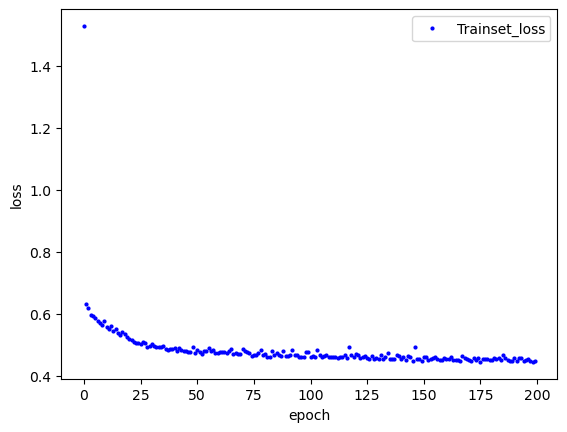

In [37]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()